por cada modelo para determinar cuál es más adecuado para este problema
específico. 
1. Analiza, prepara y codifica adecuadamente los datos, y realiza su división para entrenamiento y prueba. 
2. Aplica modelos de clasificación previamente entrenados y probados. (4 puntos)
3. Evalúa el rendimiento de algoritmos de clasificación, utilizando las métricas

In [4]:
import pandas as pd

#cargamos el dataset
data = pd.read_excel('ramen-ratings.xlsx')
print(data.head())

   Review #           Brand  \
0      2580       New Touch   
1      2579        Just Way   
2      2578          Nissin   
3      2577         Wei Lih   
4      2576  Ching's Secret   

                                             Variety Style Country Stars  \
0                           T's Restaurant Tantanmen   Cup   Japan  3.75   
1  Noodles Spicy Hot Sesame Spicy Hot Sesame Guan...  Pack  Taiwan     1   
2                      Cup Noodles Chicken Vegetable   Cup     USA  2.25   
3                      GGE Ramen Snack Tomato Flavor  Pack  Taiwan  2.75   
4                                    Singapore Curry  Pack   India  3.75   

  Top Ten  
0     NaN  
1     NaN  
2     NaN  
3     NaN  
4     NaN  


In [5]:
#eliminamos las filas con 'Unrated' en la columna 'Stars' para tener rangos numericos
data_cleaned = data[data['Stars'] != 'Unrated']

#convertimos 'Stars' a numerico
data_cleaned['Stars'] = pd.to_numeric(data_cleaned['Stars'], errors='coerce')

#crearemos una nueva columa llamada 'Target' que sera 'bueno' (>=3.0) o 'malo' (<3.0)
data_cleaned['Target'] = data_cleaned['Stars'].apply(lambda x: 'bueno' if x >= 3.0 else 'malo')

#eliminamos las filas con valores faltantes en 'Stars'
data_cleaned = data_cleaned.dropna(subset=['Stars'])

#printeamos los resultados con la nueva columna 'Target'
print(data_cleaned[['Stars', 'Target']].head())


   Stars Target
0   3.75  bueno
1   1.00   malo
2   2.25   malo
3   2.75   malo
4   3.75  bueno


C:\Users\FpymeTarapaca\AppData\Local\Temp\ipykernel_20508\2167800799.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_cleaned['Stars'] = pd.to_numeric(data_cleaned['Stars'], errors='coerce')
C:\Users\FpymeTarapaca\AppData\Local\Temp\ipykernel_20508\2167800799.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_cleaned['Target'] = data_cleaned['Stars'].apply(lambda x: 'bueno' if x >= 3.0 else 'malo')


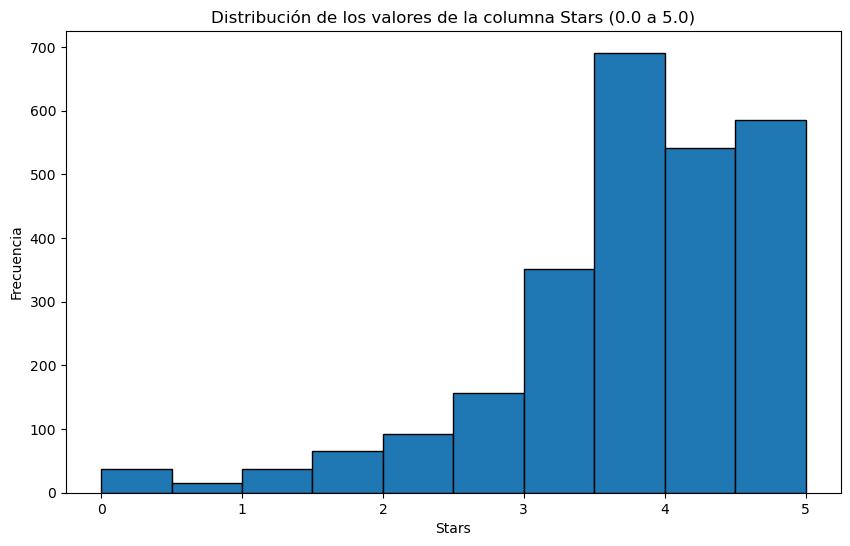

In [11]:
#es importante tambien visualizar las 'Stars' y la frecuencia
import matplotlib.pyplot as plt

# Ordenar los datos por la columna 'Stars'
data_cleaned_sorted = data_cleaned.sort_values(by='Stars')

# Graficar la distribución de los valores de 'Stars'
plt.figure(figsize=(10,6))
plt.hist(data_cleaned_sorted['Stars'], bins=10, edgecolor='black')
plt.title('Distribución de los valores de la columna Stars (0.0 a 5.0)')
plt.xlabel('Stars')
plt.ylabel('Frecuencia')
plt.show()


In [13]:
#Codificacion y division del conjunto de datos
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder

#seleccionamos las columnas con caracteristicas que usaremos para el modelo
X = data_cleaned.drop(columns=['Target', 'Stars'])  #eliminamos las columas 
y = data_cleaned['Target']

#codificamos variables categoricas
X_encoded = pd.get_dummies(X, drop_first=True)

#codigicamos la variable objetivo
le = LabelEncoder()
y_encoded = le.fit_transform(y)

#ahora divivimos los datos de entrenamiento (70%) y prueba (30%)
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y_encoded, test_size=0.3, random_state=42)

#y por ultimo normalizamos los datos
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [14]:
#entrenamiento de los modelos de clasificacion 2regresion logistica y support vector machine"
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

#entrenamos el modelo con regresion logistica
lr_model = LogisticRegression()
lr_model.fit(X_train_scaled, y_train)

#entrenamos el modelo de "support vector machine segun la guia" 
svm_model = SVC(kernel='linear', probability=True)
svm_model.fit(X_train_scaled, y_train)


SVC(kernel='linear', probability=True)

evaluacion del modelo: regresion logistica
precision: 0.83
Recall: 0.16
presicion: 0.44
F1-score: 0.24
evaluacion del modelo: SVM
precision: 0.83
Recall: 0.19
presicion: 0.40
F1-score: 0.26


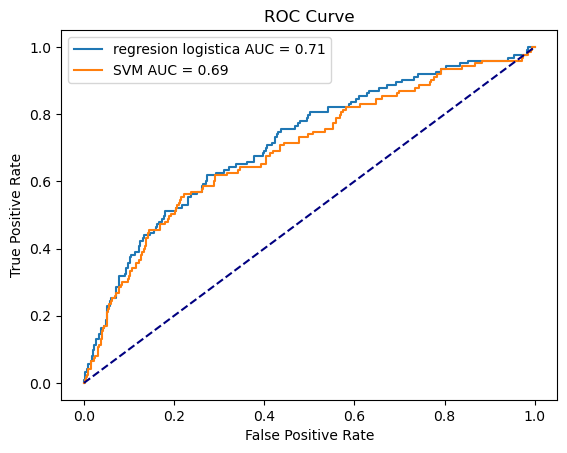

In [15]:
#evaluamos los modelos y el rendimiento de ambos modelos utilizando metricas como precision, recall, F1-score y AUC-ROC
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, roc_auc_score, roc_curve
import matplotlib.pyplot as plt

#nuestras predicciones
y_pred_lr = lr_model.predict(X_test_scaled)
y_pred_svm = svm_model.predict(X_test_scaled)

#evaluamos el rendimiento de recall y f1
def evaluate_model(y_test, y_pred, model_name):
    print(f"evaluacion del modelo: {model_name}")
    print(f"precision: {accuracy_score(y_test, y_pred):.2f}")
    print(f"Recall: {recall_score(y_test, y_pred):.2f}")
    print(f"presicion: {precision_score(y_test, y_pred):.2f}")
    print(f"F1-score: {f1_score(y_test, y_pred):.2f}")

#evaluamos ambos modelos
evaluate_model(y_test, y_pred_lr, 'regresion logistica')
evaluate_model(y_test, y_pred_svm, 'SVM')

#aplicamos AUC-ROC para regresion logistica
y_prob_lr = lr_model.predict_proba(X_test_scaled)[:,1]
fpr_lr, tpr_lr, _ = roc_curve(y_test, y_prob_lr)
roc_auc_lr = roc_auc_score(y_test, y_prob_lr)

#aplicamos AUC-ROC para support vector machine
y_prob_svm = svm_model.decision_function(X_test_scaled)
fpr_svm, tpr_svm, _ = roc_curve(y_test, y_prob_svm)
roc_auc_svm = roc_auc_score(y_test, y_prob_svm)

#y port ultimo graficamos la curva
plt.figure()
plt.plot(fpr_lr, tpr_lr, label=f'regresion logistica AUC = {roc_auc_lr:.2f}')
plt.plot(fpr_svm, tpr_svm, label=f'SVM AUC = {roc_auc_svm:.2f}')
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()


In [16]:
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score

#evaluamos el conjunto de entrenamiento
y_train_pred = lr_model.predict(X_train)
print("entrenamiento de presicion:", accuracy_score(y_train, y_train_pred))
print("entrenamiento de regresion :\n", classification_report(y_train, y_train_pred))

# Evaluación en el conjunto de prueba
y_test_pred = lr_model.predict(X_test)
print("prueba de presicion:", accuracy_score(y_test, y_test_pred))
print("prueba de clasificacion:\n", classification_report(y_test, y_test_pred))

# AUC-ROC
print("entrenamiento  AUC-ROC:", roc_auc_score(y_train, lr_model.predict_proba(X_train)[:, 1]))
print("prueba AUC-ROC:", roc_auc_score(y_test, lr_model.predict_proba(X_test)[:, 1]))


entrenamiento de presicion: 0.8424847476428176
entrenamiento de regresion :
               precision    recall  f1-score   support

           0       0.84      1.00      0.91      1519
           1       0.00      0.00      0.00       284

    accuracy                           0.84      1803
   macro avg       0.42      0.50      0.46      1803
weighted avg       0.71      0.84      0.77      1803

prueba de presicion: 0.8410852713178295
prueba de clasificacion:
               precision    recall  f1-score   support

           0       0.84      1.00      0.91       651
           1       0.00      0.00      0.00       123

    accuracy                           0.84       774
   macro avg       0.42      0.50      0.46       774
weighted avg       0.71      0.84      0.77       774

entrenamiento  AUC-ROC: 0.6344518725254754
prueba AUC-ROC: 0.6807225906360447


C:\Users\FpymeTarapaca\anaconda3\Lib\site-packages\sklearn\base.py:457: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(
C:\Users\FpymeTarapaca\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\FpymeTarapaca\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\FpymeTarapaca\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 